# **Feature selection**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [23]:
housing = fetch_california_housing(as_frame=True)

In [24]:
X = housing.data
y = housing.target

In [25]:
X.shape, y.shape

((20640, 8), (20640,))

In [27]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## **univariate selection with SelectKBest class**

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

extract top 4 best features

In [38]:
bestFeatures = SelectKBest(score_func=f_regression, k=4)
fit = bestFeatures.fit(X, y)

In [43]:
selected_scores = pd.DataFrame(fit.scores_)
selected_features = pd.DataFrame(X.columns[selected_indices])

In [44]:
selected_features

,0
0,MedInc
1,AveRooms
2,Latitude
3,HouseAge


concatenate two dataframes for better visualization

In [45]:
featureScores = pd.concat([selected_features, selected_scores],axis=1)
featureScores.columns = ['Specs','Score']

In [46]:
print(featureScores.nlargest(4, 'Score'))

      Specs         Score
0    MedInc  18556.571631
2  Latitude    487.757462
6       NaN    438.005453
1  AveRooms    232.841479




---

## **Feature importance scoring**

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [51]:
print(model.feature_importances_)

[0.52495392 0.05087689 0.05312349 0.02731498 0.0325696  0.1312438
 0.09448925 0.08542806]


In [52]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

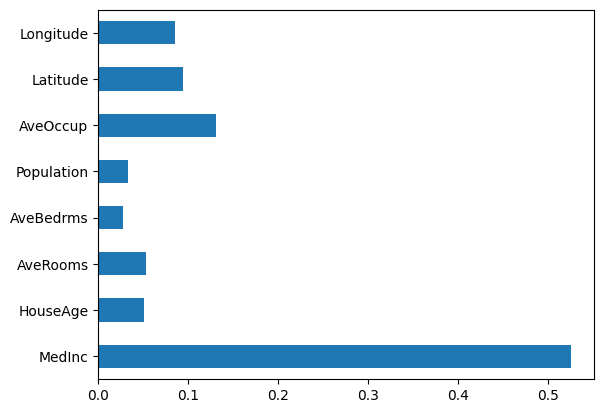

In [53]:
feat_importances.plot(kind='barh')
plt.show()



---


## **Correlation matrix heatmap**

In [55]:
corrmat = housing.data.corr()

In [57]:
top_corr_features = corrmat.index

<Axes: >

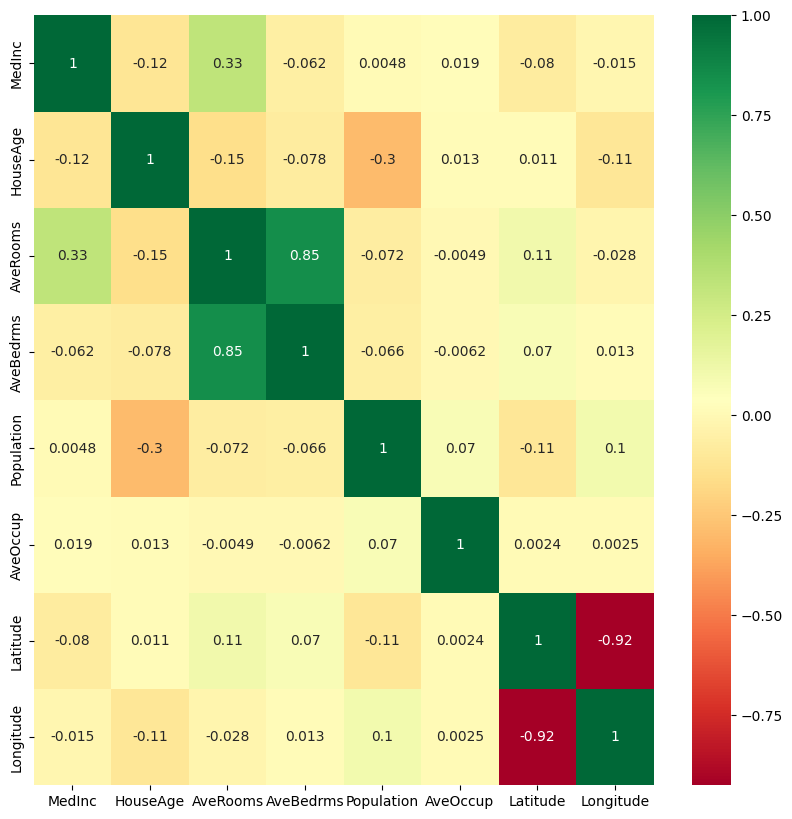

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(housing.data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

**AveRooms** is most highly correlated with **AveBedrms** (0.85)

Second, **MedInc** (0.33)